## Maestría en Inteligencia Artificial Aplicada

### PROYECTO INTEGRADOR

MODELO ML PREDICCION DE ABANDONO DE TARJETA DE CREDITO

Avance 5 Modelo Final

Equipo 45

Felipe de Jesús Gastélum Lizárraga - A01114918

Jonathan Montaña Vásquez - A01793920

Irvin Gómez Esquivel - A00361034

2/6/2024

### Introducción

El presente notebook busca mejorar el rendimiento de los modelos y reducir sus debilidades. Exploraremos modelos de ensamble, optimización de hiperparámetros, compararemos estrategias de ensamble homogéneas y heterogéneas.

También haremos una comparación con los modelos previos y seleccionaremos un modelo para el cual haremos graficos representativos como Matriz de Confusion.

### Preparación

In [1]:
# librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from scipy import stats

from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from io import BytesIO

#Librerias de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

import os
import pandas as pd
from google.colab import drive

### Carga del dataset

In [2]:
#Establecer coneccion con drive para poder cargar el arhivo de la base de datos
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importar base de datos

import requests, zipfile
from io import *

url='https://drive.google.com/file/d/1g7GJ6JYnPkTc4G7WGrT3ZvMAl9nPsw_J/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

req = requests.get(url)
print('Downloading Completed')





# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/sample_data/AbandonoTarjeta')
df = pd.read_csv("/content/sample_data/AbandonoTarjeta/BankChurners.csv",sep=',')

### Estructura de los datos

In [4]:
#Vista General de Columnas y Primeros datos
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
#Información Estadistica General
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
#Verificar si hay columnas con valores nulos
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Con lo anterior, podemos observar que el dataset no tiene valores nulos

### Análisis de datos categóricos



#### Identificación de valores categóricos

Ahora buscamos los valores categóricos que luego convertiremos a valores numéricos

In [7]:
print("Gender")
print(df["Gender"].unique())
print("Education Level")
print(df["Education_Level"].unique())
print("Income Category")
print(df["Income_Category"].unique())
print("Marital Status")
print(df["Marital_Status"].unique())
print("Card Category")
print(df["Card_Category"].unique())

Gender
['M' 'F']
Education Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Income Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Marital Status
['Married' 'Single' 'Unknown' 'Divorced']
Card Category
['Blue' 'Gold' 'Silver' 'Platinum']


Observamos que tanto en Education Level, Income Category y Martial Status tenemos rows de Unknown, vamos a revisar cuantos registros tenemos de cada uno para saber si los incluimos en la transformación o si mejor los eliminamos

### Preprocesamiento

#### Conteo de valores desconocidos

In [8]:
df[df.Education_Level=="Unknown"]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880
11,710821833,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,...,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174,0.000198,0.999800
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,4234.0,972,3262.0,1.707,1348,27,1.700,0.230,0.000063,0.999940
17,753327333,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,...,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095,0.000150,0.999850
23,811604133,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,...,2492.0,1560,932.0,0.573,1126,23,0.353,0.626,0.000207,0.999790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,712296408,Existing Customer,36,F,3,Unknown,Married,$40K - $60K,Blue,22,...,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175,0.000345,0.999650
10094,716123283,Existing Customer,59,M,1,Unknown,Single,$60K - $80K,Blue,48,...,7288.0,0,7288.0,0.640,14873,120,0.714,0.000,0.000057,0.999940
10095,789023508,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,...,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032,0.000106,0.999890
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,0.998130,0.001874


Hay 1519 rows con Education Level = unknown, lo que quiere decir que nos conviene más mantenerlos o perderemos un gran porcentaje de registros.

Vamos a revisar ahora Income Category

In [9]:
df[df.Income_Category=="Unknown"]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
19,709327383,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,...,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080,0.000055,0.999940
28,718813833,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,34,...,10100.0,0,10100.0,0.525,1052,18,1.571,0.000,0.000121,0.999880
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.997800,0.002197
44,720572508,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,...,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209,0.000317,0.999680
58,711427458,Existing Customer,44,F,5,Graduate,Married,Unknown,Blue,35,...,6273.0,978,5295.0,2.275,1359,25,1.083,0.156,0.000057,0.999940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,...,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575,0.993300,0.006700
10040,714677583,Attrited Customer,50,F,3,Doctorate,Single,Unknown,Blue,36,...,5173.0,0,5173.0,0.912,8757,68,0.789,0.000,0.997800,0.002196
10083,718170033,Existing Customer,42,F,4,Uneducated,Married,Unknown,Blue,23,...,8348.0,0,8348.0,0.695,15905,111,0.708,0.000,0.000059,0.999940
10092,713437008,Attrited Customer,40,F,3,Graduate,Married,Unknown,Blue,25,...,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273,0.994990,0.005010


También son más de 1000 registros, por lo que será mejor conservarla.

Ahora veamos Martial Status

In [10]:
df[df.Marital_Status=="Unknown"]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.999910
10,708790833,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,...,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217,0.000191,0.999810
13,816082233,Existing Customer,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,...,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195,0.000096,0.999900
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,4234.0,972,3262.0,1.707,1348,27,1.700,0.230,0.000063,0.999940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,747551658,Existing Customer,47,M,3,High School,Unknown,$80K - $120K,Silver,40,...,34516.0,1371,33145.0,0.691,15930,123,0.836,0.040,0.000164,0.999840
10100,719848008,Existing Customer,39,M,2,Graduate,Unknown,$60K - $80K,Silver,36,...,29808.0,0,29808.0,0.669,16098,128,0.684,0.000,0.000103,0.999900
10101,718372458,Existing Customer,42,M,2,Graduate,Unknown,$40K - $60K,Blue,30,...,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461,0.000565,0.999440
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,0.998130,0.001874


Tenemos 749 Rows, los suficientes como para decidir no borrarlos

#### Transformación de datos categóricos a numéricos

Para Gender vamos a usar One Hot Encoding y remover la columna original, terminaremos con 2 columnas Gender_F y Gender_M

##### One Hot Encoding

In [11]:
df_gender = pd.get_dummies(df['Gender'], prefix="Gender", dtype=int)
df = pd.concat([df, df_gender], axis=1).reindex(df.index)
df.drop('Gender', axis=1, inplace=True)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F,Gender_M
0,768805383,Existing Customer,45,3,High School,Married,$60K - $80K,Blue,39,5,...,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,0,1
1,818770008,Existing Customer,49,5,Graduate,Single,Less than $40K,Blue,44,6,...,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,1,0
2,713982108,Existing Customer,51,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,0,1
3,769911858,Existing Customer,40,4,High School,Unknown,Less than $40K,Blue,34,3,...,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,1,0
4,709106358,Existing Customer,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,2,Graduate,Single,$40K - $60K,Blue,40,3,...,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,0,1
10123,710638233,Attrited Customer,41,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,0,1
10124,716506083,Attrited Customer,44,1,High School,Married,Less than $40K,Blue,36,5,...,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,1,0
10125,717406983,Attrited Customer,30,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,0,1


Realmente no necesitamos las 2 columnas Gender_F y Gender_M pues se asume que Gender_F = 0 en realidad es igual a Gender_M = 1, vamos a remover la columna Gender_M

In [12]:
df.drop('Gender_M', axis=1, inplace=True)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
0,768805383,Existing Customer,45,3,High School,Married,$60K - $80K,Blue,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,0
1,818770008,Existing Customer,49,5,Graduate,Single,Less than $40K,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,1
2,713982108,Existing Customer,51,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,0
3,769911858,Existing Customer,40,4,High School,Unknown,Less than $40K,Blue,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,1
4,709106358,Existing Customer,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,2,Graduate,Single,$40K - $60K,Blue,40,3,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,0
10123,710638233,Attrited Customer,41,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,0
10124,716506083,Attrited Customer,44,1,High School,Married,Less than $40K,Blue,36,5,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,1
10125,717406983,Attrited Customer,30,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,0


##### Codificación Ordinal

Para Education Level vamos a tomar los siguientes valores

'Unknown' = 0
'Uneducated' = 1
'High School' = 2
'College' = 3
'Graduate' = 4
'Post-Graduate' = 5
'Doctorate' = 6

Esta variable también es conveniente transformarla a ordinal, donde los números más bajos representan menos preparación académica y los números más altos representan mayor preparación académica.

In [13]:
df['Education_Level'] = df['Education_Level'].replace({'Unknown' : 0, 'Uneducated' : 1, 'High School' : 2, 'College' : 3, 'Graduate': 4, 'Post-Graduate' : 5, 'Doctorate' : 6})
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,2.601955,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.529081
std,3.690378e+07,8.016814,1.298908,1.700417,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.499178
min,7.080821e+08,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000
25%,7.130368e+08,41.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000
50%,7.179264e+08,46.000000,2.000000,3.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,1.000000
75%,7.731435e+08,52.000000,3.000000,4.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,1.000000
max,8.283431e+08,73.000000,5.000000,6.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000


Para Income category, vamos a utilizar los siguientes valores
'Unknown' = 0

'Less than $40K' = 1

'$40K - $60K' = 2

'$60K - $80K' = 3  

'$80K - $120K' = 4  

'$120K +' = 5

En este caso, estamos definiendo que la variable se puede convertir a ordinal definida por el nivel de ingresos a nivel más alto, número ordinal más grande.


In [14]:
df['Income_Category'] = df['Income_Category'].replace({'Unknown' : 0, 'Less than $40K' : 1, '$40K - $60K' : 2, '$60K - $80K' : 3, '$80K - $120K': 4, '$120K +' : 5})
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,2.601955,2.085711,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.529081
std,3.690378e+07,8.016814,1.298908,1.700417,1.474639,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.499178
min,7.080821e+08,26.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000
25%,7.130368e+08,41.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000
50%,7.179264e+08,46.000000,2.000000,3.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,1.000000
75%,7.731435e+08,52.000000,3.000000,4.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,1.000000
max,8.283431e+08,73.000000,5.000000,6.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000


Vamos a convertir Marital Status a Ordinal también, estuvimos debatiendo si debería ser OneHotEncoding o no, pero al parecer podemos establecer el siguiente orden
'Unknown' = 0
'Single' = 1
'Married' = 2
'Divorced' = 3

Lo hacemos de manera ordinal porque establecemos que hay un proceso de Soltero -> Casado -> Divorciado

In [15]:
df['Marital_Status'] = df['Marital_Status'].replace({'Unknown' : 0, 'Single' : 1, 'Married' : 2, 'Divorced' : 3})
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,2.601955,1.536585,2.085711,35.928409,3.812580,2.341167,2.455317,...,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.529081
std,3.690378e+07,8.016814,1.298908,1.700417,0.737808,1.474639,7.986416,1.554408,1.010622,1.106225,...,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.499178
min,7.080821e+08,26.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000
25%,7.130368e+08,41.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,...,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000
50%,7.179264e+08,46.000000,2.000000,3.000000,2.000000,2.000000,36.000000,4.000000,2.000000,2.000000,...,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,1.000000
75%,7.731435e+08,52.000000,3.000000,4.000000,2.000000,3.000000,40.000000,5.000000,3.000000,3.000000,...,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,1.000000
max,8.283431e+08,73.000000,5.000000,6.000000,3.000000,5.000000,56.000000,6.000000,6.000000,6.000000,...,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000


Card Category es otra que también podemos convertir a Ordinal de la siguiente manera
'Blue' = 1
'Silver' = 2
'Gold' = 3
'Platinum' = 4

Aquí también definimos que es ordinal porque podemos decir que las tarjetas Blue son las más básicas, mientras que la Platinum es la que más privilegios/beneficios otorga

In [16]:
df['Card_Category'] = df['Card_Category'].replace({'Blue' : 1, 'Silver' : 2, 'Gold' : 3, 'Platinum' : 4})
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,2.601955,1.536585,2.085711,1.083638,35.928409,3.812580,2.341167,...,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.529081
std,3.690378e+07,8.016814,1.298908,1.700417,0.737808,1.474639,0.333784,7.986416,1.554408,1.010622,...,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.499178
min,7.080821e+08,26.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,...,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000
25%,7.130368e+08,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,...,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000
50%,7.179264e+08,46.000000,2.000000,3.000000,2.000000,2.000000,1.000000,36.000000,4.000000,2.000000,...,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,1.000000
75%,7.731435e+08,52.000000,3.000000,4.000000,2.000000,3.000000,1.000000,40.000000,5.000000,3.000000,...,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,1.000000
max,8.283431e+08,73.000000,5.000000,6.000000,3.000000,5.000000,4.000000,56.000000,6.000000,6.000000,...,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000


In [17]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer' : 1, 'Attrited Customer' : 0})
df.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.839340,46.325960,2.346203,2.601955,1.536585,2.085711,1.083638,35.928409,3.812580,...,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.529081
std,3.690378e+07,0.367235,8.016814,1.298908,1.700417,0.737808,1.474639,0.333784,7.986416,1.554408,...,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.499178
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000,...,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000
25%,7.130368e+08,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,...,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000
50%,7.179264e+08,1.000000,46.000000,2.000000,3.000000,2.000000,2.000000,1.000000,36.000000,4.000000,...,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,1.000000
75%,7.731435e+08,1.000000,52.000000,3.000000,4.000000,2.000000,3.000000,1.000000,40.000000,5.000000,...,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,1.000000
max,8.283431e+08,1.000000,73.000000,5.000000,6.000000,3.000000,5.000000,4.000000,56.000000,6.000000,...,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000


### Análisis Univariante

In [18]:
df.select_dtypes(include=np.number)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
0,768805383,1,45,3,2,2,3,1,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,0
1,818770008,1,49,5,4,1,1,1,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,1
2,713982108,1,51,3,4,2,4,1,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,0
3,769911858,1,40,4,2,0,1,1,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,1
4,709106358,1,40,3,1,2,3,1,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,2,4,1,2,1,40,3,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,0
10123,710638233,0,41,2,0,3,2,1,25,4,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,0
10124,716506083,0,44,1,2,2,1,1,36,5,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,1
10125,717406983,0,30,2,4,0,2,1,36,4,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,0


#### Boxplot

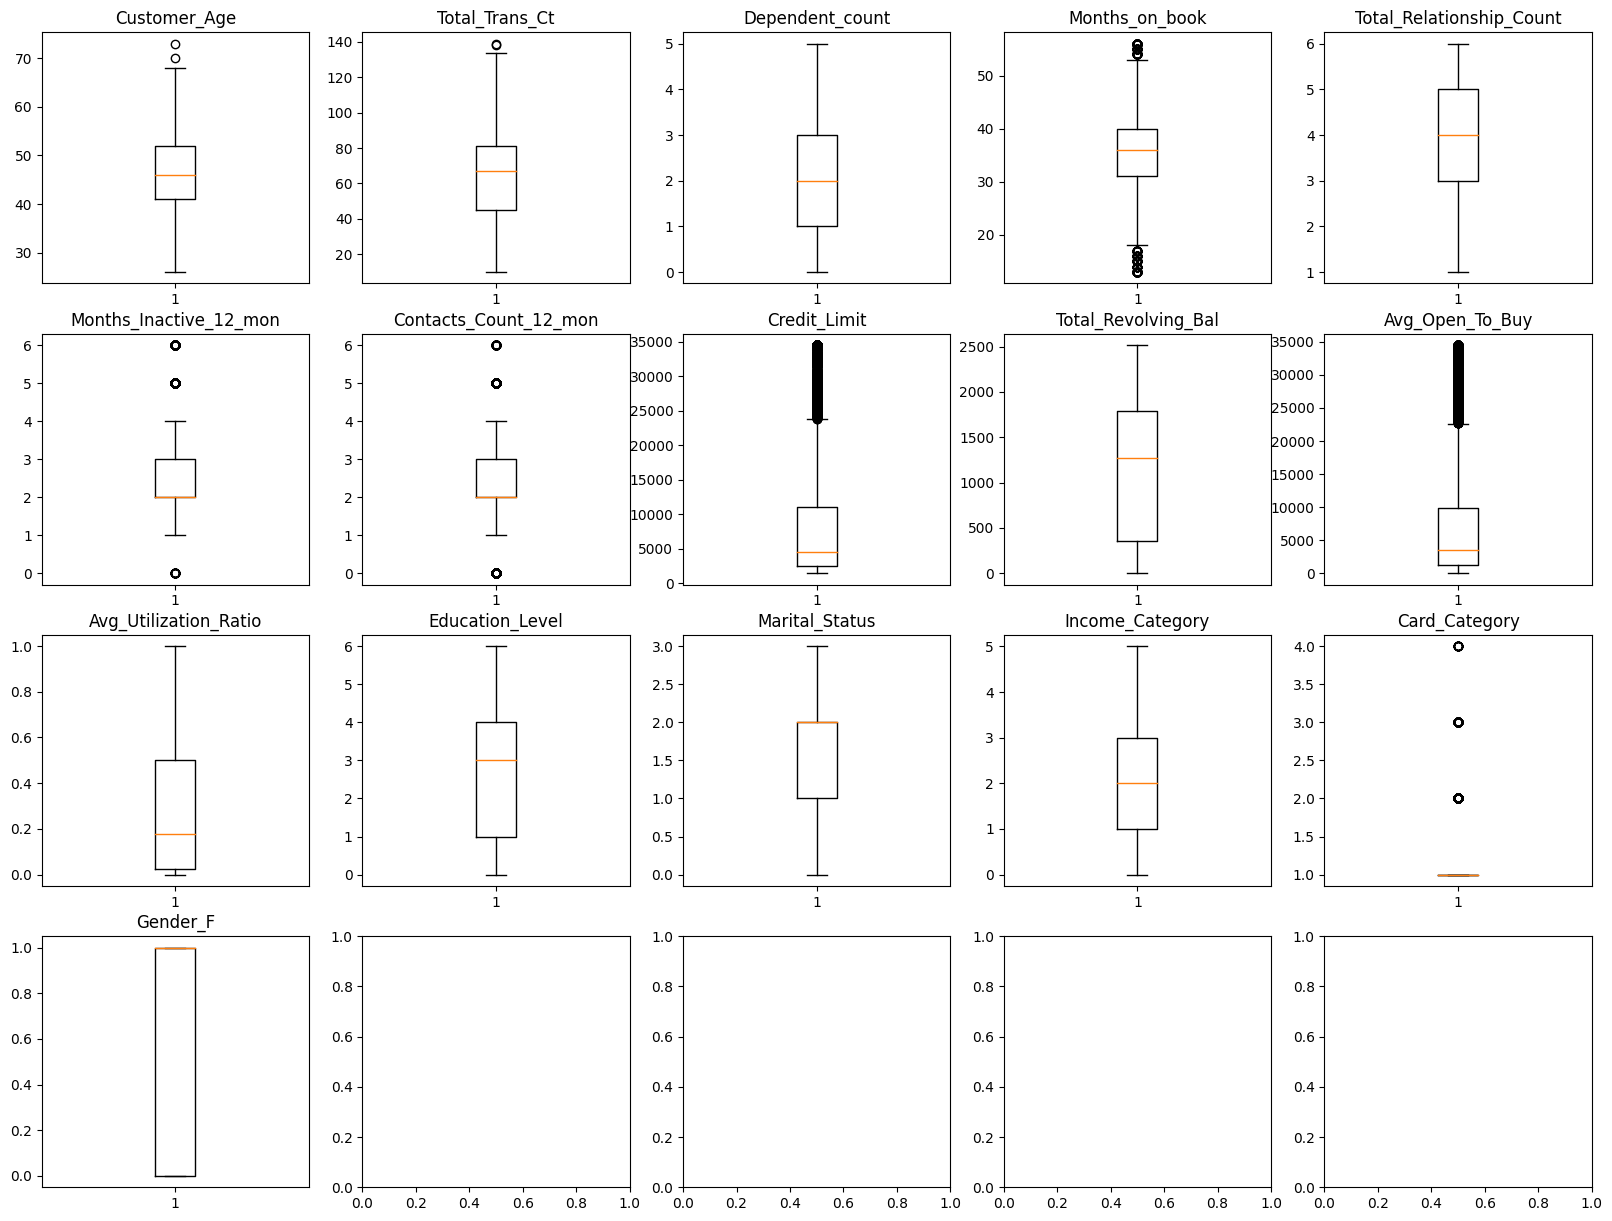

In [19]:
#Graficar Boxplot de Variables Importantes

campos_x = ["Customer_Age","Total_Trans_Ct","Dependent_count","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Avg_Utilization_Ratio", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Gender_F"]
campos_y = ["Attrition_Flag"]

df_campos_num = df[campos_x]

numcol = df_campos_num.columns.size

plt.subplots(nrows=4, ncols=5, figsize=(20,15))
for i in range(numcol):
  promedio = df_campos_num[df_campos_num.columns[i]].mean()
  plt.subplot(4,5,1+i)
  plt.boxplot(df_campos_num[df_campos_num.columns[i]]) #plt.hist(df_campos_num[df_campos_num.columns[i]], alpha = 0.5, color = 'b')
  plt.title(df_campos_num.columns[i])
  #plt.axvline(promedio, color='k', linestyle='dashed', linewidth=1)
  #min_ylim, max_ylim = plt.ylim()
  #plt.text(promedio*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(promedio))



plt.show()


Después de observar los boxplots podemos observar lo siguiente:
1. Dimensiones con Outliers: Edad, Total de transacciones, Meses como cliente, Meses inactivo, Conteo de contactos, Límite de crédito
2. Tipo de Tarjeta de crédito tiene tantos del primer tipo y tan poco de los niveles elevados que sólo la tarjeta Blue no es considerada Outlier
3. En cuanto al Genero, están distribuidos uniformemente entre Masculino y Femenino.

Los puntos 1 y 2 implica que es necesario hacer una limpieza más a fondo de los datos para remover los outliers

#### Eliminación de outliers

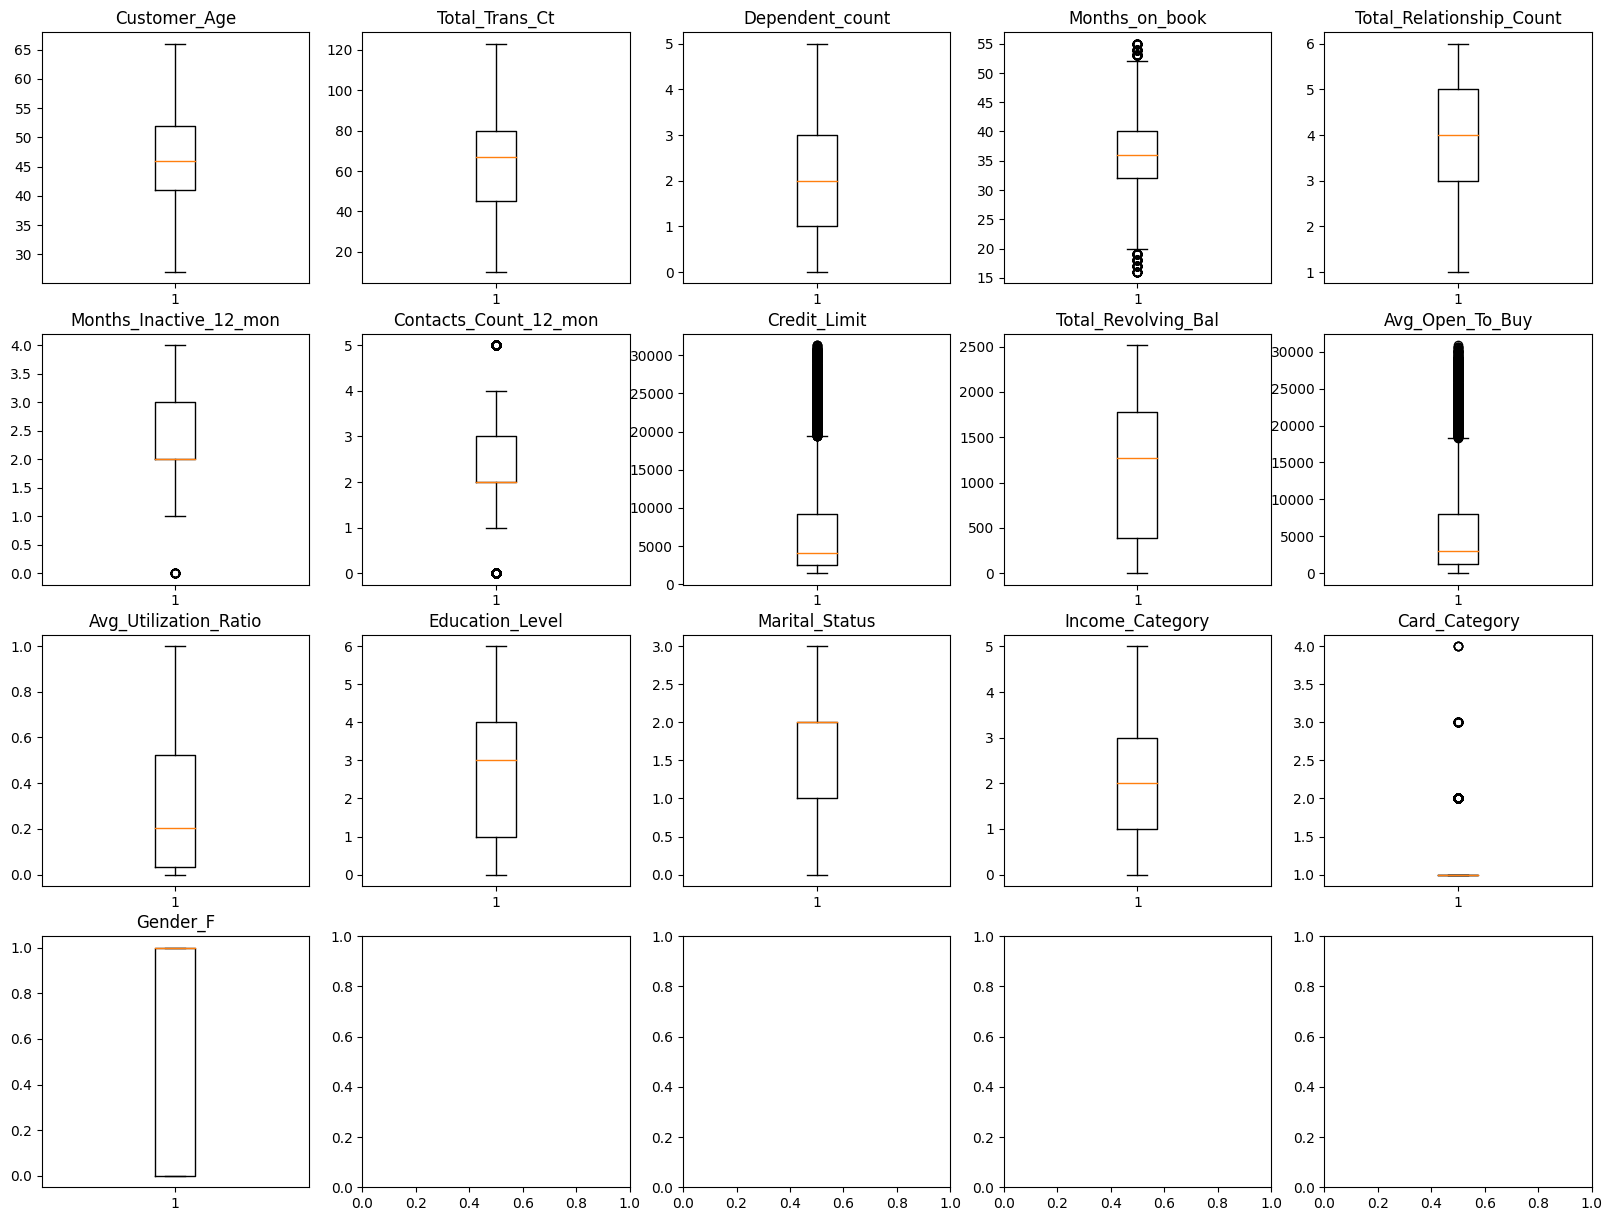

In [20]:
#Eliminación de Outliers

#Eliminar Outliers y graficar Boxplot Nuevamente
columnas_outliers = ["Customer_Age","Total_Trans_Ct","Months_on_book","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit"]

df_new = df[(np.abs(stats.zscore(df[columnas_outliers])) < 2.5).all(axis=1)] # 2.5

df_campos_num_new = df_new[campos_x]

numcol = df_campos_num_new.columns.size

plt.subplots(nrows=4, ncols=5, figsize=(20,15))
for i in range(numcol):
  plt.subplot(4,5,1+i)
  plt.boxplot(df_campos_num_new[df_campos_num_new.columns[i]]) #plt.hist(df_campos_num[df_campos_num.columns[i]], alpha = 0.5, color = 'b')
  plt.title(df_campos_num_new.columns[i])
  #plt.axvline(promedio, color='k', linestyle='dashed', linewidth=1)
  #min_ylim, max_ylim = plt.ylim()
  #plt.text(promedio*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(promedio))



plt.show()


#### Histogramas

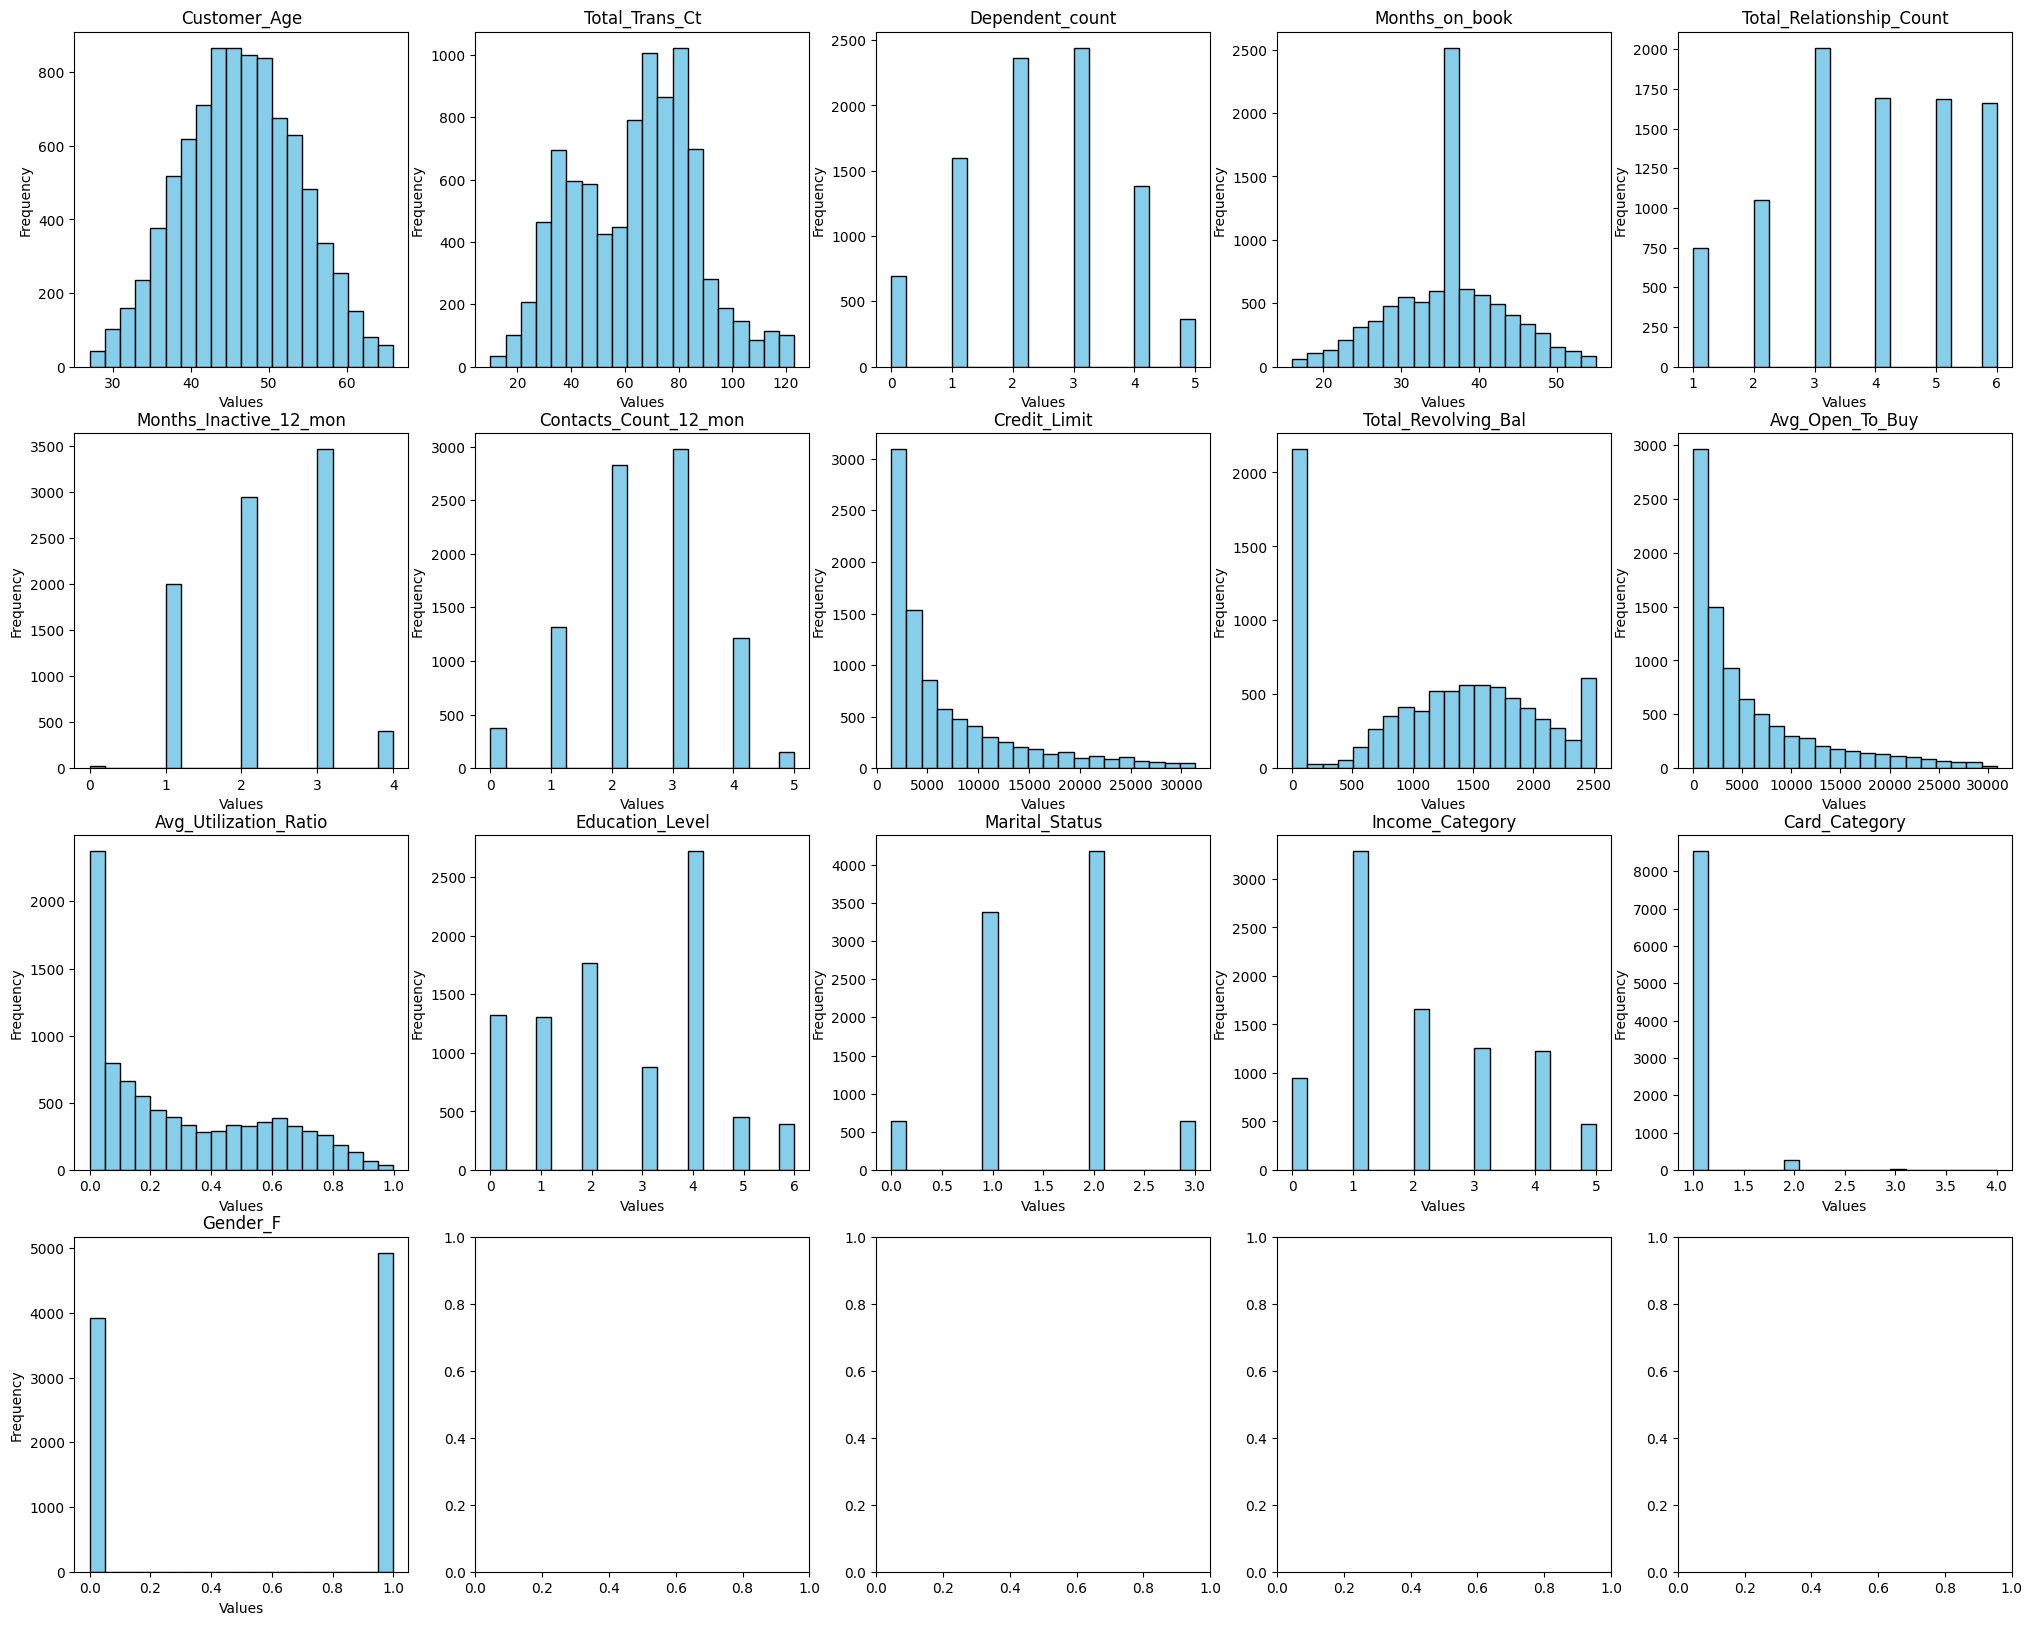

In [21]:
plt.subplots(nrows=4, ncols=5, figsize=(25,20))
for i in range(numcol):
  plt.subplot(4,5,1+i)
  plt.hist(df_campos_num_new[df_campos_num_new.columns[i]], bins=20, color='skyblue', edgecolor='black')
  plt.xlabel("Values")
  plt.ylabel("Frequency")
  plt.title(df_campos_num_new.columns[i])
  #plt.axvline(promedio, color='k', linestyle='dashed', linewidth=1)
  #min_ylim, max_ylim = plt.ylim()
  #plt.text(promedio*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(promedio))



plt.show()

Después de observar los histogramas, podemos observar lo siguiente
1. La edad de los clientes, el conteo de transacciones, número de dependientes económicos y el número de meses como cliente siguen una distribución normal.
2. El Género está prácticamente dividido por igual entre Masculino y Femenino

### Análisis bi/multivariante

#### Matriz de Correlación

In [22]:
df_corr = df_new.copy()
##df_corr['Attrition_Flag'] = df_corr['Attrition_Flag'].replace({'Attrited Customer' : 0, 'Existing Customer' : 1})
df_campos_num_corr = df_corr[["Attrition_Flag", "Customer_Age","Total_Trans_Ct","Dependent_count","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Avg_Utilization_Ratio", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Gender_F"]]


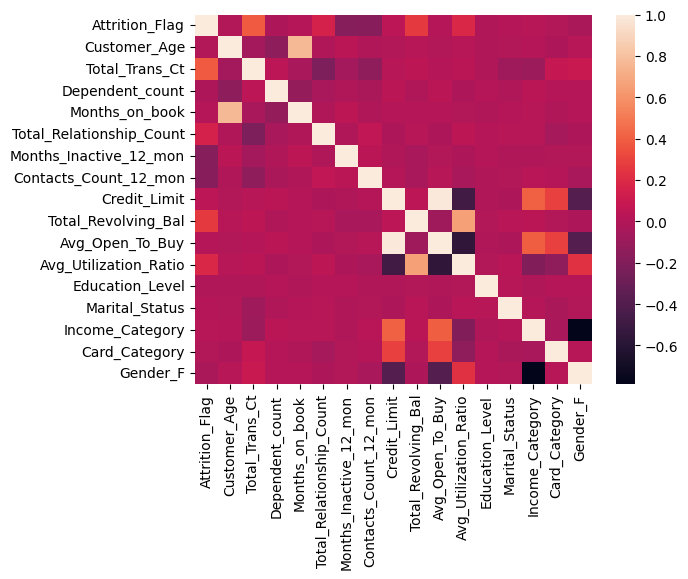

In [ ]:
df_campos_num_corr.corr()
dataplot = sns.heatmap(df_campos_num_corr.corr(),xticklabels='auto')
plt.show()

De la matriz de correlación podemos observar que no hay una correlación muy directa entre nuestra variable de salida Attrition_Flag y el resto de las variables numéricas. Haremos un análisis con PCA para obtener más conclusiones.

#### Análisis de Componentes Principales (PCA)

In [23]:
#Normalizar Datos
scaler = MinMaxScaler()
df_campos_num_norm = pd.DataFrame(scaler.fit_transform(df_campos_num_new))
df_campos_num_norm.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000
mean,0.497398,0.478688,0.474864,0.511742,0.569914,0.562472,0.485918,0.185514,0.461813,0.188413,0.290938,0.433469,0.515032,0.398689,0.013186,0.557188
std,0.196144,0.199745,0.255127,0.190246,0.308596,0.216266,0.216449,0.218740,0.323419,0.212244,0.277128,0.283567,0.244709,0.281301,0.073672,0.496747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.358974,0.309735,0.200000,0.410256,0.400000,0.500000,0.400000,0.034931,0.156635,0.038897,0.031031,0.166667,0.333333,0.200000,0.000000,0.000000
50%,0.487179,0.504425,0.400000,0.512821,0.600000,0.500000,0.400000,0.090753,0.506754,0.098654,0.203203,0.500000,0.666667,0.400000,0.000000,1.000000
75%,0.641026,0.619469,0.600000,0.615385,0.800000,0.750000,0.600000,0.261194,0.707986,0.261077,0.524525,0.666667,0.666667,0.600000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
pcs = PCA()

pcs.fit(df_campos_num_norm.dropna(axis=0))

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Standard deviation,0.575322,0.393269,0.315976,0.284050,0.278975,0.273342,0.245042,0.237497,0.221523,0.211790,0.182405,0.155437,0.120728,0.092600,0.068735,5.929182e-17
Proportion of variance,0.297015,0.138783,0.089591,0.072401,0.069837,0.067045,0.053881,0.050614,0.044035,0.040250,0.029856,0.021680,0.013079,0.007694,0.004239,3.154607e-33
Cumulative proportion,0.297015,0.435797,0.525388,0.597789,0.667626,0.734671,0.788553,0.839167,0.883201,0.923451,0.953307,0.974987,0.988066,0.995761,1.000000,1.000000e+00


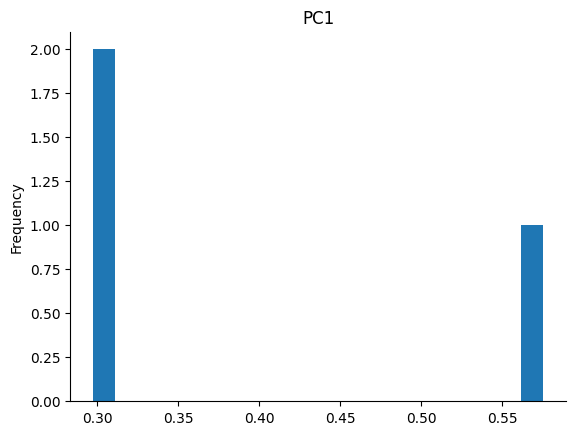

In [25]:
# @title PC1

from matplotlib import pyplot as plt
pcsSummary_df['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

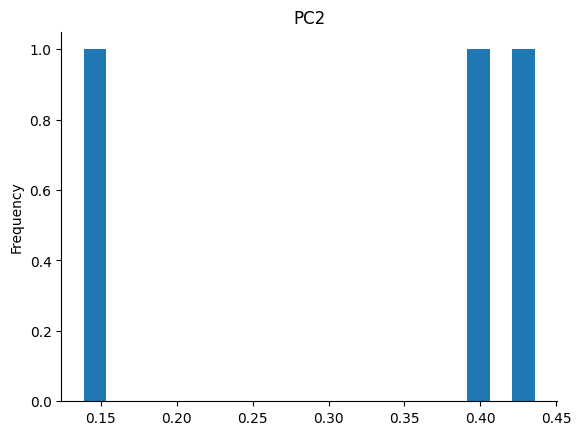

In [26]:
# @title PC2

from matplotlib import pyplot as plt
pcsSummary_df['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

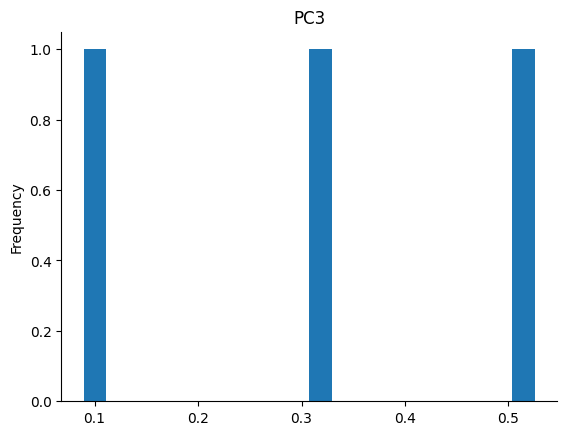

In [27]:
# @title PC3

from matplotlib import pyplot as plt
pcsSummary_df['PC3'].plot(kind='hist', bins=20, title='PC3')
plt.gca().spines[['top', 'right',]].set_visible(False)

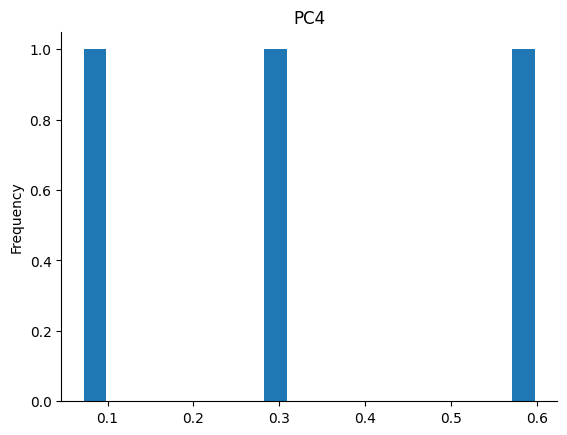

In [28]:
# @title PC4

from matplotlib import pyplot as plt
pcsSummary_df['PC4'].plot(kind='hist', bins=20, title='PC4')
plt.gca().spines[['top', 'right',]].set_visible(False)

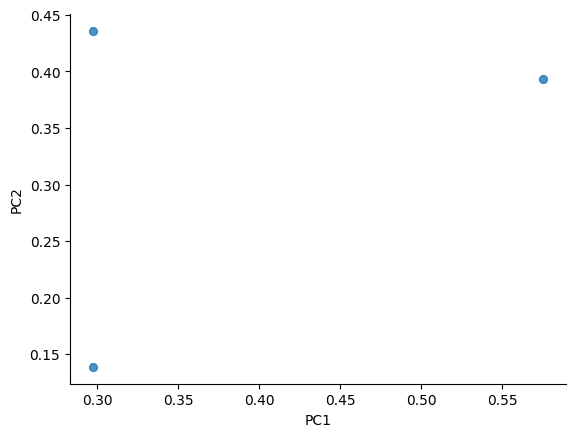

In [29]:
# @title PC1 vs PC2

from matplotlib import pyplot as plt
pcsSummary_df.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

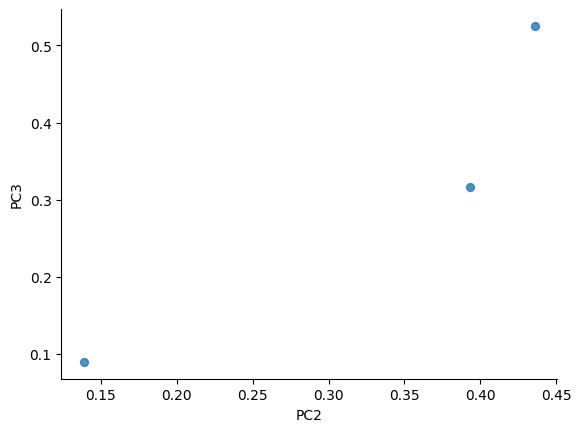

In [30]:
# @title PC2 vs PC3

from matplotlib import pyplot as plt
pcsSummary_df.plot(kind='scatter', x='PC2', y='PC3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

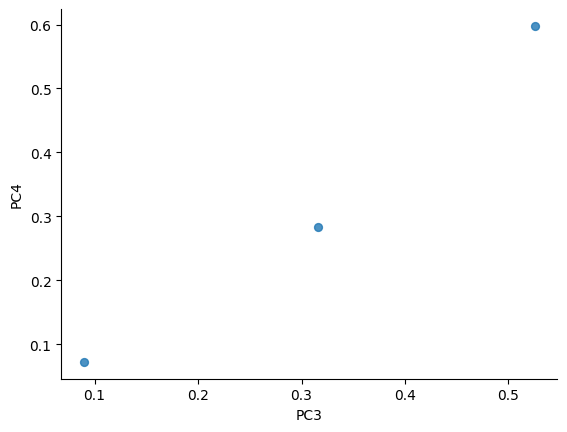

In [31]:
# @title PC3 vs PC4

from matplotlib import pyplot as plt
pcsSummary_df.plot(kind='scatter', x='PC3', y='PC4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

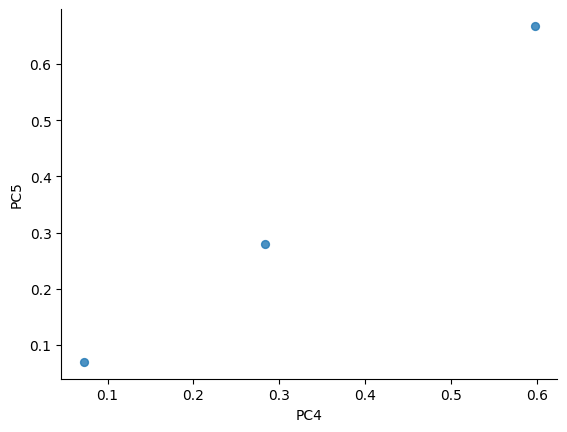

In [32]:
# @title PC4 vs PC5

from matplotlib import pyplot as plt
pcsSummary_df.plot(kind='scatter', x='PC4', y='PC5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

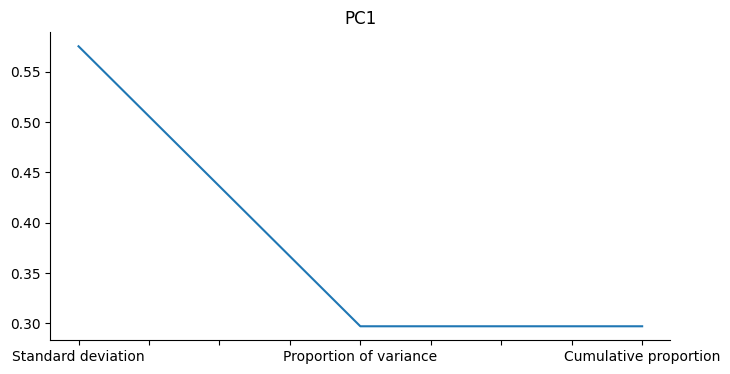

In [33]:
# @title PC1

from matplotlib import pyplot as plt
pcsSummary_df['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

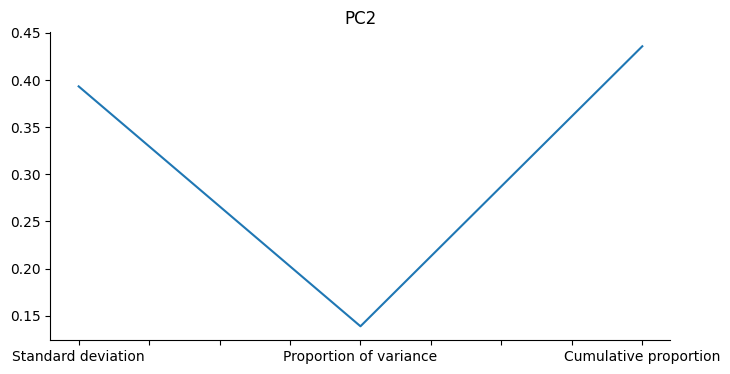

In [34]:
# @title PC2

from matplotlib import pyplot as plt
pcsSummary_df['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

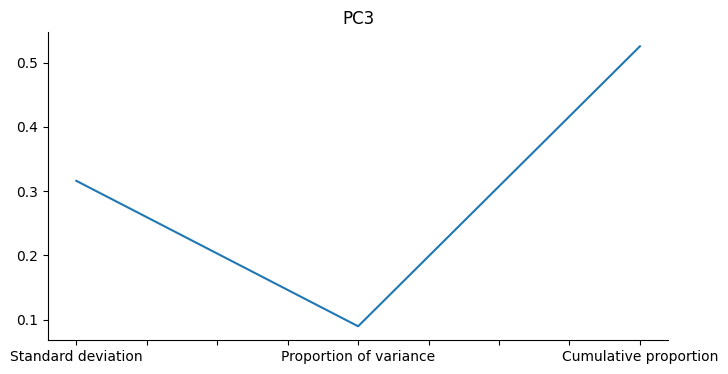

In [35]:
# @title PC3

from matplotlib import pyplot as plt
pcsSummary_df['PC3'].plot(kind='line', figsize=(8, 4), title='PC3')
plt.gca().spines[['top', 'right']].set_visible(False)

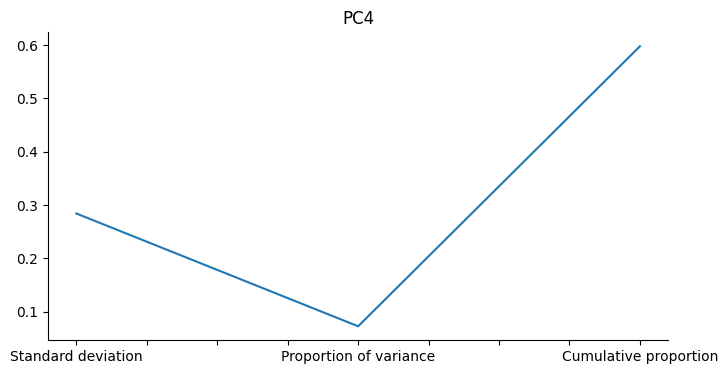

In [36]:
# @title PC4

from matplotlib import pyplot as plt
pcsSummary_df['PC4'].plot(kind='line', figsize=(8, 4), title='PC4')
plt.gca().spines[['top', 'right']].set_visible(False)

In [37]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary_df.columns,
                                index = df_campos_num_new.columns
                                )
pcsComponents_df.iloc[:,:5]

pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary_df.columns,
                                index = df_campos_num_new.columns
                                )

grafica = pcsComponents_dfX.iloc[:,:8]

grafica.style.background_gradient()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Customer_Age,-0.005283,0.011728,-0.004152,-0.100925,-0.167468,0.501775,0.021817,-0.454157
Total_Trans_Ct,-0.035518,-0.002338,0.243359,0.000757,0.078110,-0.043850,0.126112,0.082052
Dependent_count,0.005925,-0.026518,0.119732,0.095800,0.299401,-0.579746,-0.054209,-0.727345
Months_on_book,-0.001393,0.005125,-0.001813,-0.087954,-0.152896,0.471778,0.014711,-0.458425
Total_Relationship_Count,0.009959,0.082307,-0.931311,-0.051253,0.244147,-0.025780,0.074301,-0.062570
Months_Inactive_12_mon,0.000156,-0.029728,-0.010483,0.011209,-0.081269,0.064623,0.012528,-0.132904
Contacts_Count_12_mon,0.020017,-0.026707,-0.108601,-0.015338,-0.045596,0.011733,-0.017715,0.093262
Credit_Limit,0.216246,-0.121007,0.104121,-0.052341,0.542373,0.239620,-0.042452,0.056405
Total_Revolving_Bal,-0.030729,0.739857,0.147916,-0.026610,0.381833,0.157941,-0.019749,0.037878
Avg_Open_To_Buy,0.211832,-0.177410,0.088740,-0.048499,0.493917,0.219088,-0.039485,0.051515


In [38]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+100,y[i]+100)

### Analisis de la variable objetivo

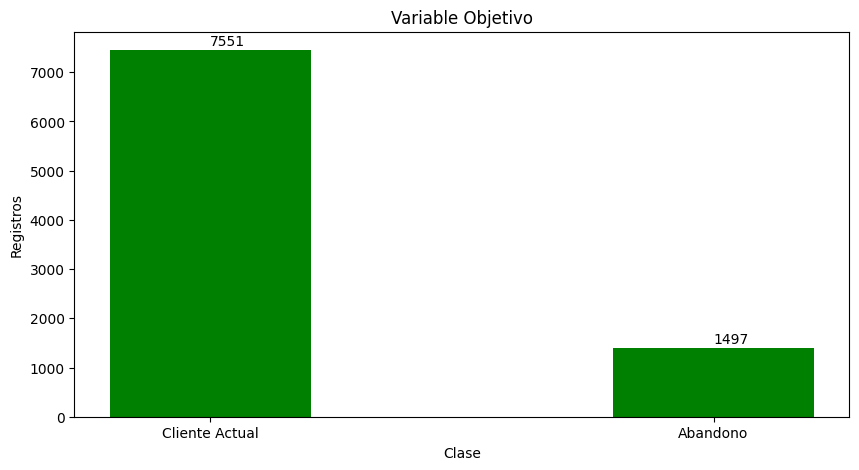

In [39]:
#ANALISIS DE VARIABLE OBJETIVO
df_y = df_new[["Attrition_Flag"]] #variable objetivo

clases = list(["Cliente Actual", "Abandono"])
values = list([
    len(df_new[df_new['Attrition_Flag'] == 1]),
    len(df_new[df_new['Attrition_Flag'] == 0])
    ])

fig = plt.figure(figsize = (10, 5))

plt.bar(clases, values, color ='green', width = 0.4)

addlabels(clases, values)




plt.xlabel("Clase")
plt.ylabel("Registros")
plt.title("Variable Objetivo")
plt.show()

Podemos observar que nuestra variable de salida no está balanceada, pues tenemos casi 5 veces más instancias de *cliente actual* comparado con *abandono* esto lo tomaremos en cuenta en las siguientes partes del proceso

In [40]:
df_campos_num_new.describe()

,Customer_Age,Total_Trans_Ct,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio,Education_Level,Marital_Status,Income_Category,Card_Category,Gender_F
count,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000
mean,46.398508,64.091772,2.374322,35.957957,3.849571,2.249887,2.429589,6986.601967,1162.382798,5824.219168,0.290647,2.600814,1.545095,1.993445,1.039557,0.557188
std,7.649603,22.571233,1.275636,7.419592,1.542978,0.865062,1.082247,6542.000435,814.045205,6557.476261,0.276851,1.701404,0.734126,1.406504,0.221015,0.496747
min,27.000000,10.000000,0.000000,16.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,41.000000,45.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2483.000000,394.250000,1204.750000,0.031000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,46.000000,67.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4152.500000,1275.500000,3051.000000,0.203000,3.000000,2.000000,2.000000,1.000000,1.000000
75%,52.000000,80.000000,3.000000,40.000000,5.000000,3.000000,3.000000,9250.000000,1782.000000,8069.250000,0.524000,4.000000,2.000000,3.000000,1.000000,1.000000
max,66.000000,123.000000,5.000000,55.000000,6.000000,4.000000,5.000000,31346.000000,2517.000000,30899.000000,0.999000,6.000000,3.000000,5.000000,4.000000,1.000000


### Modelo predictivo

#### Determinación de X, Y y split

Vamos a tomar un set de entrenamiento de 85%

In [121]:
#Determinamos las columnas que tendra el eje x
X = df_new[campos_x]

#Determinamos las columnas que contendra el eje y
y = df_new[campos_y]

#Creamos nuestros datos de validación con la función trains_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=10)


In [122]:
X_train.describe()

,Customer_Age,Total_Trans_Ct,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio,Education_Level,Marital_Status,Income_Category,Card_Category,Gender_F
count,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000
mean,46.384840,64.098936,2.380452,35.967819,3.847340,2.254521,2.432447,6920.046476,1153.154122,5766.892354,0.289523,2.600798,1.544282,1.989761,1.038165,0.559309
std,7.633654,22.523551,1.275180,7.380923,1.540461,0.865072,1.077628,6479.294586,816.409041,6496.959072,0.277342,1.701083,0.733125,1.404220,0.214530,0.496503
min,27.000000,10.000000,0.000000,16.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,41.000000,45.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2477.000000,169.500000,1211.000000,0.015500,1.000000,1.000000,1.000000,1.000000,0.000000
50%,46.000000,67.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4108.500000,1266.000000,3000.500000,0.202000,3.000000,2.000000,2.000000,1.000000,1.000000
75%,52.000000,80.000000,3.000000,40.000000,5.000000,3.000000,3.000000,9149.000000,1776.000000,7980.500000,0.523250,4.000000,2.000000,3.000000,1.000000,1.000000
max,66.000000,123.000000,5.000000,55.000000,6.000000,4.000000,5.000000,31346.000000,2517.000000,30899.000000,0.999000,6.000000,3.000000,5.000000,4.000000,1.000000


In [123]:
y_train.describe()

,Attrition_Flag
count,7520.000000
mean,0.840160
std,0.366482
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


#### Definición de Modelos a comparar
Vamos a trabajar con los siguientes algoritmos: Regresión Logística, Arbol de Decisión, Random Forest, Perceptron Lineal Multicapa, Máquina de Vector Soporte y K-Vecinos más cercanos

In [124]:
#Definicion de Modelos a Aplicar
def get_models():
  #Creamos dos listas para ir metiendo los modelos
  modelos = list()
  nombres = list()


  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear', class_weight="balanced"))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier(class_weight="balanced"))
  nombres.append('DT')

  #RD - Ranfom Forest
  modelos.append(RandomForestClassifier(class_weight="balanced"))
  nombres.append('RF')

  # MLP - Red Neuronal Artificial / Perceptrón Lineal Multicapa:
  modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000))
  nombres.append('MLP')

  # SVM - Máquina de Vector Soporte:
  modelos.append(SVC(gamma='scale', class_weight="balanced"))
  nombres.append('SVM')

  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier())
  nombres.append('kNN')

  # GNB - Gaussian Naive Bayes:
  modelos.append(GaussianNB())
  nombres.append('GNB')


  return modelos, nombres

#### Funciones de desempeño
Las siguientes funciones nos servirán para entender el desempeño de cada uno de los algoritmos. Generamos una función para cada una de las metricas: Accuracy, Precision, Recall, F1Score, Geometric Mean

In [125]:
#Funciones de Desempeño

#Estos parametros los usamos para auxilio en comparaciones, pero no son solicitados por el maestro

def mi_recall_verdaderos_negativos(yreal, ypred): #Esta Metrica es como la de Recall pero aplicada a los verdaderos negativos, ya que por la naturaleza del problema estamos interesados en la capacidad de predecir los verdaderos negativos
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision_n = (tn)/(tn+fp)
  return precision_n


def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

#f score
def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)+fp+fn)
  return f1score

#Media Geometrica
def mi_gmean(yreal, ypred):

     tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
     recall = tp / (tp + fn)
     precision = tp / (tp + fp)
     gmean=np.sqrt(recall*precision)
     return gmean

#### Comparativa de los modelos
Para cada una incluímos sus scores de Accuracy, Precision, Recall, F1Score y Gmean. Además de también mostrar su correspondiente matriz de confusión.

In [126]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()
txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']

total_registros = len(y_val)
total_abandono = len(y_val[y_val['Attrition_Flag'] == 0])


for i in range(len(modelos)):

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('m',modelos[i])]) ##pipeline = Pipeline(steps=[('ct',Col_Trans),('m',modelos[i])])

  mismetricas = {
      "precisionN":make_scorer(mi_recall_verdaderos_negativos),
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }

  resultadosOU = cross_validate(pipeline, X_train, y_train.values.ravel(), scoring = mismetricas, cv=kfold)

  resultados.append(resultadosOU)

  #IMPRIMIR DATOS DE ENTRENAMIENTO
  print('%s:\nmean Recall VN: %.3f (%.4f)\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_precisionN']),
                                                                          np.std(resultadosOU['test_precisionN']),
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']),
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),
                                                                          np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean'])
                                                                          ))

  #ENTRENAR MODELO Y PROBAR CON DATOS DE VALIDACION
  #modelo_listo = modelos[i].fit(X_train, y_train.values.ravel())

  #pp = modelo_listo.predict(X_val) #Valores Reales de validacion
  #cm = confusion_matrix(y_val, pp)
  #frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  #porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]
  #labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
  #labels = np.asarray(labels).reshape(2,2)

  #ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
  #ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  #plt.show()
  #print("\n\n\n\")

  #abandono_predicho = cm[0][0] / total_abandono
  #print("Total Predichos Correctamente: ",round(modelo_listo.score(X_val, np.ravel(y_val))*100,2),"% ( ",cm[0][0]+cm[1][1],"/",total_registros," )")
  #print("Abandonos Predichos Correctamente: ",round(abandono_predicho*100,2),"% ( ",cm[0][0],"/",total_abandono," )")
  #print("\n\n\n\n\n\n")


LR:
mean Recall VN: 0.829 (0.0231)
mean Accuracy: 0.813 (0.0103)
mean Precision: 0.961 (0.0049)
mean Recall: 0.810 (0.0121)
mean F1score: 0.879 (0.0073)
Gmean: 0.882 (0.0069)

DT:
mean Recall VN: 0.625 (0.0405)
mean Accuracy: 0.884 (0.0092)
mean Precision: 0.929 (0.0070)
mean Recall: 0.933 (0.0096)
mean F1score: 0.931 (0.0056)
Gmean: 0.931 (0.0056)

RF:
mean Recall VN: 0.629 (0.0239)
mean Accuracy: 0.920 (0.0059)
mean Precision: 0.932 (0.0041)
mean Recall: 0.975 (0.0048)
mean F1score: 0.953 (0.0035)
Gmean: 0.953 (0.0035)

MLP:
mean Recall VN: 0.482 (0.2785)
mean Accuracy: 0.799 (0.0977)
mean Precision: 0.905 (0.0374)
mean Recall: 0.859 (0.1609)
mean F1score: 0.869 (0.0805)
Gmean: 0.876 (0.0728)

SVM:
mean Recall VN: 0.663 (0.0223)
mean Accuracy: 0.743 (0.0077)
mean Precision: 0.922 (0.0048)
mean Recall: 0.758 (0.0088)
mean F1score: 0.832 (0.0056)
Gmean: 0.836 (0.0053)

kNN:
mean Recall VN: 0.364 (0.0258)
mean Accuracy: 0.860 (0.0068)
mean Precision: 0.887 (0.0040)
mean Recall: 0.954 (0

Los 2 modelos con mejor desempeño fueron: Regresión Logistica y Random Forest




#### GridSearch
Utilizaremos grid search para buscar los hiperparámetros con mejor desempeño tanto para Regresión Logística como para Randor Forest.
Primero definimos los hiperparámetros para la comparación.

In [ ]:
#Diccionario de Hiperparametros para el GridSearch

#REGRESION LOGISTICA
dicc_grid_rl = {
    "C":[1000,100,10,1,0,0.01],
    "penalty":["l1","l2"],
    "solver":[ 'lbfgs', 'liblinear', 'sag', 'saga'],
    "class_weight":["balanced"]
    }

#RANDOM FOREST
dicc_grid_rf = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    "class_weight":["balanced"]
    }

##### Función Make Grid

In [ ]:
#Funcion MAKE GRID
def make_grid(modelo,xtrain,ytrain,dicc_grid,scorer,title):

  #pipeline = Pipeline(steps=[('ct',preprocessor),('modelo',modelo)])
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

   #mismetricas = { 'accuracy': make_scorer(mi_accuracy), 'f1_score': make_scorer(mi_f1score), 'precision': make_scorer(mi_precision),
   #             'recall': make_scorer(mi_recall)}

  grid= GridSearchCV(modelo,
                      param_grid=dicc_grid,
                      cv=cv,
                      scoring=make_scorer(scorer))


  grid.fit(xtrain, np.ravel(ytrain))

  print('\033[1m %s: \033[0m ' %(title))
  print(' Mejor score obtenido con la mejor combinación:', grid.best_score_)
  print(' Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
  print(' Métrica utilizada:', grid.scoring)
  print('\n\n')

##### Hiperparámetros óptimos
Encontramos los hiperparámetros óptimos. Como parte de este proceso definimos Recall sobre los Verdaderos Negativos como la métrica principal para comparar el desempeño entre los modelos.
La segunda métrica que vamos a considerar para la comparación es F1-Score

###### Regresion Logística

In [ ]:
#ENCONTRAR HIPERPARAMETROS OPTIMOS
import warnings
warnings.simplefilter('ignore')
#REGRESIÓN LOGISTICA
#El Id:0 corresponde al modelo de regresión logistca

#Metrica: Accuracy
make_grid(modelos[0],X_train, y_train,dicc_grid_rl,mi_recall_verdaderos_negativos,nombres[0]+" - "+"Recall VN")

 LR - Recall VN:  
 Mejor score obtenido con la mejor combinación: 0.8308344859382204
 Mejor combinación de valores encontrados de los hiperparámetros: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
 Métrica utilizada: make_scorer(mi_recall_verdaderos_negativos)





In [ ]:
#Metrica: F1-Score
make_grid(modelos[0],X_train, y_train,dicc_grid_rl,mi_f1score,nombres[0]+" - "+"F1-Score")

 LR - F1-Score:  
 Mejor score obtenido con la mejor combinación: 0.8798764519578478
 Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
 Métrica utilizada: make_scorer(mi_f1score)





###### Random Forest

In [ ]:
#RANDOM FOREST
#El Id:2 corresponde al modelo de Random Forest: accuracy

#Metrica: Accuracy
make_grid(modelos[2],X_train, y_train,dicc_grid_rf,mi_recall_verdaderos_negativos,nombres[2]+" - "+"Recall VN")

 RF - Recall VN:  
 Mejor score obtenido con la mejor combinación: 0.8449838635315813
 Mejor combinación de valores encontrados de los hiperparámetros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
 Métrica utilizada: make_scorer(mi_recall_verdaderos_negativos)





In [ ]:
#Metrica: F1-Score
make_grid(modelos[2],X_train, y_train,dicc_grid_rf,mi_f1score,nombres[2]+" - "+"F1-Score")

 RF - F1-Score:  
 Mejor score obtenido con la mejor combinación: 0.9481195056317745
 Mejor combinación de valores encontrados de los hiperparámetros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
 Métrica utilizada: make_scorer(mi_f1score)





##### Modelo con mejor desempeño Random Forest
Los hiperparámetros seleccionados nos arrojaron Random Forest como el mejor modelo.

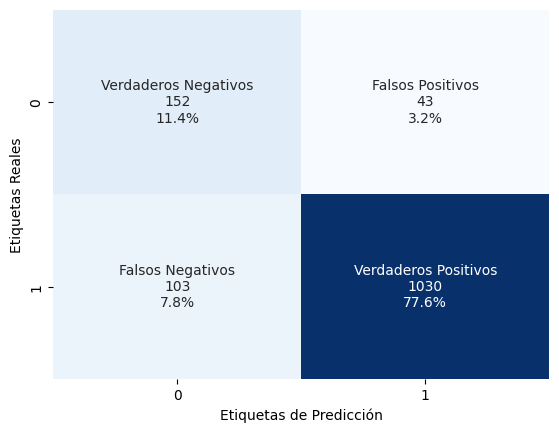

Total Predichos Correctamente:  89.01 % (  1182 / 1328  )
Abandonos Predichos Correctamente:  77.95 % (  152 / 195  )









In [127]:
#MODELO FINAL: RANDOM FOREST CON HIPERPARAMETROS OPTIMOS

modelo_final_rf = RandomForestClassifier(class_weight= 'balanced', criterion= 'gini', max_depth = 4, max_features= 'sqrt', n_estimators= 200)

modelo_listo_rf = modelo_final_rf.fit(X_train, y_train.values.ravel())

pp = modelo_listo_rf.predict(X_val) #Valores Reales de validacion
cm = confusion_matrix(y_val, pp)

frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()


abandono_predicho = cm[0][0] / total_abandono


print("Total Predichos Correctamente: ",round(modelo_listo_rf.score(X_val, np.ravel(y_val))*100,2),"% ( ",cm[0][0]+cm[1][1],"/",total_registros," )")
print("Abandonos Predichos Correctamente: ",round(abandono_predicho*100,2),"% ( ",cm[0][0],"/",total_abandono," )")
print("\n\n\n\n\n\n")


##### Segundo modelo de acuerdo a grid search: Regresión Logística
Los hiperparámetros seleccionados nos arrojaron Random Forest como el mejor modelo, sin embargo hacemos una comparativa de la matriz de confusión de ambos modelos con los hiperparámetros óptimos.

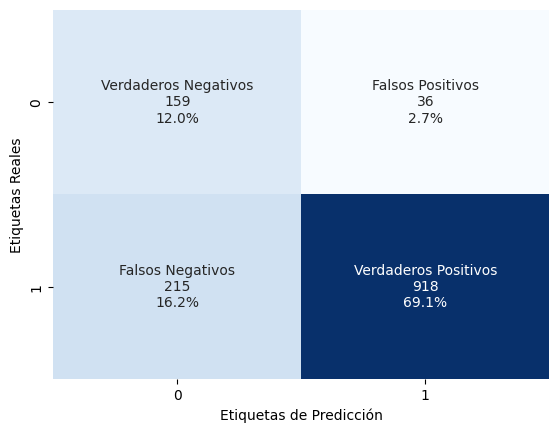

Total Predichos Correctamente:  81.1 % (  1077 / 1328  )
Abandonos Predichos Correctamente:  81.54 % (  159 / 195  )









In [128]:
#MODELO FINAL: REGRESION LOGISTICA CON HIPERPARAMETROS OPTIMOS
import warnings
warnings.simplefilter('ignore')

modelo_final_lr = LogisticRegression(C= 100, class_weight='balanced', penalty = 'l2', solver = 'liblinear')

modelo_listo_lr = modelo_final_lr.fit(X_train, y_train.values.ravel())

pp = modelo_listo_lr.predict(X_val) #Valores Reales de validacion
cm = confusion_matrix(y_val, pp)

frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()


abandono_predicho = cm[0][0] / total_abandono


print("Total Predichos Correctamente: ",round(modelo_listo_lr.score(X_val, np.ravel(y_val))*100,2),"% ( ",cm[0][0]+cm[1][1],"/",total_registros," )")
print("Abandonos Predichos Correctamente: ",round(abandono_predicho*100,2),"% ( ",cm[0][0],"/",total_abandono," )")
print("\n\n\n\n\n\n")

Podemos observar que los *Verdaderos Negativos* que son la métrica que nos interesa predecir con nuestro modelo, son mejores en *Regresión Logística* que en *Random Forest*. Esto se puede deber a muchos factores, pero principalmente pudiera ser que el modelo de *Random Forest* con los hiperparámetros seleccionados esté *sobreentrenado* y por ese motivo las métricas parecieran ser muy buenas, pero la matriz de confusión demuestra un desempeño ligeramente menor que *Regresión Logísitica*

### Modelos de Ensamble

#### Crear variedad de modelos de ensamble para el problema planteado

##### Homogéneo
El ensamble homogeneo implica múltiples instancias del mismo modelo. Utilizamos VotingClassifier para obtener el resultado

Training time: 0.469510555267334s
Voting Clasifier Score (Hard):  0.8117469879518072


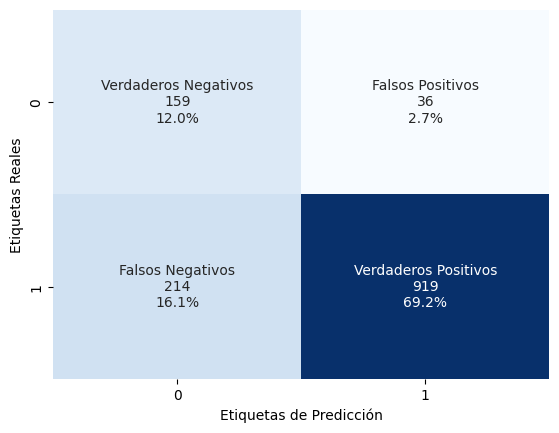

Total Predichos Correctamente:  81.17 % (  1078 / 1328  )
Abandonos Predichos Correctamente:  81.54 % (  159 / 195  )









In [169]:
import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import VotingClassifier
import time

modelo_final_lr_1 = LogisticRegression(C= 1000, class_weight='balanced', penalty = 'l2', solver = 'liblinear')
modelo_final_lr_2 = LogisticRegression(C= 10, class_weight='balanced', penalty = 'l2', solver = 'liblinear')
modelo_final_lr_3 = LogisticRegression(C= 1, class_weight='balanced', penalty = 'l2', solver = 'liblinear')
modelo_combinado_1 = VotingClassifier(estimators=[('lr1', modelo_final_lr_1), ('lr2', modelo_final_lr_2), ('lr3', modelo_final_lr_3)], voting='hard')
start = time.time()
modelo_combinado_1.fit(X_train,y_train.values.ravel())
stop = time.time()
print(f"Training time: {stop - start}s")
#modelo_final_lr_1.fit(X_train, y_train.values.ravel())
#modelo_final_lr_2.fit(X_train, y_train.values.ravel())
#modelo_final_lr_3.fit(X_train, y_train.values.ravel())

#pred1=modelo_final_lr_1.predict(X_val)
#pred2=modelo_final_lr_2.predict(X_val)
#pred3=modelo_final_lr_3.predict(X_val)

#print("Pred1: ", pred1)
#print("\n\n")
#print("Pred2: ", pred2)
#print("\n\n")
#print("Pred3: ", pred3)
#print("\n\n")

#modelo_combinado = (pred1+pred2+pred3)/3
#print("Pred Final: ", pred_final)
#print("\n\n")

vc_pred = modelo_combinado_1.predict(X_val)

vc_score = modelo_combinado_1.score(X_val,y_val)

print("Voting Clasifier Score (Hard): ", vc_score)

cm = confusion_matrix(y_val, vc_pred)

frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()


abandono_predicho = cm[0][0] / total_abandono


print("Total Predichos Correctamente: ",round(modelo_combinado_1.score(X_val, np.ravel(y_val))*100,2),"% ( ",cm[0][0]+cm[1][1],"/",total_registros," )")
print("Abandonos Predichos Correctamente: ",round(abandono_predicho*100,2),"% ( ",cm[0][0],"/",total_abandono," )")
print("\n\n\n\n\n\n")

Lo que podemos ver es que hay una muy ligera mejoría en los verdaderos positivos, ahora vamos a intentar un ensamble homogeneo con soft voting

Training time: 0.5084850788116455s
Voting Clasifier Score (Soft):  0.8132530120481928


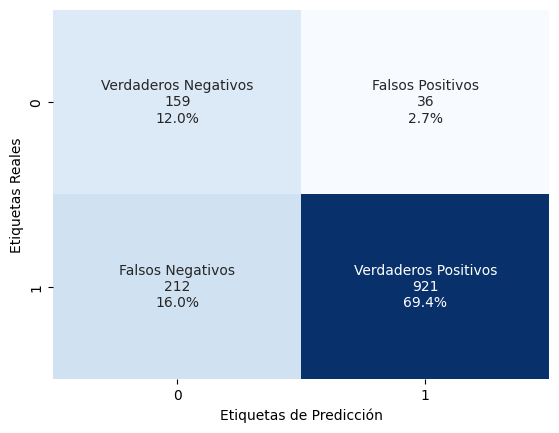

Total Predichos Correctamente:  81.33 % (  1080 / 1328  )
Abandonos Predichos Correctamente:  81.54 % (  159 / 195  )









In [170]:
modelo_combinado_2 = VotingClassifier(estimators=[('lr1', modelo_final_lr_1), ('lr2', modelo_final_lr_2), ('lr3', modelo_final_lr_3)], voting='soft')

start = time.time()
modelo_combinado_2.fit(X_train,y_train.values.ravel())
stop = time.time()
print(f"Training time: {stop - start}s")

vc_pred = modelo_combinado_2.predict(X_val)

vc_score = modelo_combinado_2.score(X_val,y_val)

print("Voting Clasifier Score (Soft): ", vc_score)

cm = confusion_matrix(y_val, vc_pred)

frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()


abandono_predicho = cm[0][0] / total_abandono


print("Total Predichos Correctamente: ",round(modelo_combinado_2.score(X_val, np.ravel(y_val))*100,2),"% ( ",cm[0][0]+cm[1][1],"/",total_registros," )")
print("Abandonos Predichos Correctamente: ",round(abandono_predicho*100,2),"% ( ",cm[0][0],"/",total_abandono," )")
print("\n\n\n\n\n\n")

El modelo tiene un desempeño ligeramente mejor con *soft* **.8132** comparado con *hard* **.8117**.
Vamos a considerar también el Random Forest como parte del Voting Clasifier

##### Heterogéneo
El ensamble heterogéneo implica la combinación de diferentes tipos de modelos.

Para lograrlo, primero creamos la función de Stacking que regresará las predicciones para cada modelo

In [155]:
from sklearn.model_selection import StratifiedKFold

def Stacking(model,train,y,test,n_fold):
  folds=StratifiedKFold(n_splits=n_fold)
  test_pred=np.empty((test.shape[0],1),float)
  train_pred=np.empty((0,1),float)
  for train_indices,val_indices in folds.split(train,y.values):
    x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
    y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

    model.fit(X=x_train,y=y_train)
    train_pred=np.append(train_pred,model.predict(x_val))
    test_pred=np.append(test_pred,model.predict(test))
  return test_pred.reshape(-1,1),train_pred

Training time: 5.566031455993652s
Voting Clasifier Score (Soft):  0.8215361445783133


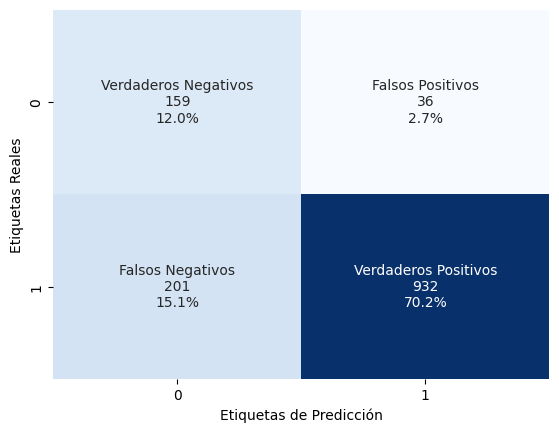

Total Predichos Correctamente:  82.15 % (  1091 / 1328  )
Abandonos Predichos Correctamente:  81.54 % (  159 / 195  )









In [171]:
modelo_combinado_3 = VotingClassifier(estimators=[('lr1', modelo_final_lr_1), ('lr2', modelo_final_lr_2), ('lr3', modelo_final_lr_3), ('lr0', modelo_final_lr),  ('rf', modelo_final_rf)], voting='soft')

start = time.time()
modelo_combinado_3.fit(X_train,y_train.values.ravel())
stop = time.time()
print(f"Training time: {stop - start}s")

vc_pred = modelo_combinado_3.predict(X_val)

vc_score = modelo_combinado_3.score(X_val,y_val)

print("Voting Clasifier Score (Soft): ", vc_score)

cm = confusion_matrix(y_val, vc_pred)

frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()


abandono_predicho = cm[0][0] / total_abandono


print("Total Predichos Correctamente: ",round(modelo_combinado_3.score(X_val, np.ravel(y_val))*100,2),"% ( ",cm[0][0]+cm[1][1],"/",total_registros," )")
print("Abandonos Predichos Correctamente: ",round(abandono_predicho*100,2),"% ( ",cm[0][0],"/",total_abandono," )")
print("\n\n\n\n\n\n")

Lo que vemos ahora es que incluyendo Random Forest y los hiperparámetros originales de Logistic Regression, llegamos a un score **.8215**


#### Sintentizar resultados en tabla comparativa

In [165]:
def get_ensamble_models():
  #Creamos dos listas para ir metiendo los modelos
  modelos = list()
  nombres = list()


  # LRH - Regresión Logística Hard:
  modelos.append(modelo_combinado_1)
  nombres.append('LRH')

  # LRS - Regresión Logística Soft:
  modelos.append(modelo_combinado_2)
  nombres.append('LRS')

  #LR-RD - Regresión Logística - Ranfom Forest - Soft
  modelos.append(modelo_combinado_3)
  nombres.append('LR-RD')

  return modelos, nombres

In [166]:
modelos, nombres = get_ensamble_models()  # cargamos los modelos a comparar
resultados = list()
txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']

total_registros = len(y_val)
total_abandono = len(y_val[y_val['Attrition_Flag'] == 0])


for i in range(len(modelos)):

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('m',modelos[i])]) ##pipeline = Pipeline(steps=[('ct',Col_Trans),('m',modelos[i])])

  mismetricas = {
      "precisionN":make_scorer(mi_recall_verdaderos_negativos),
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }

  resultadosOU = cross_validate(pipeline, X_train, y_train.values.ravel(), scoring = mismetricas, cv=kfold)

  resultados.append(resultadosOU)

  #IMPRIMIR DATOS DE ENTRENAMIENTO
  print('%s:\nmean Recall VN: %.3f (%.4f)\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_precisionN']),
                                                                          np.std(resultadosOU['test_precisionN']),
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']),
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),
                                                                          np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean'])
                                                                          ))




LRH:
mean Recall VN: 0.831 (0.0169)
mean Accuracy: 0.814 (0.0077)
mean Precision: 0.962 (0.0036)
mean Recall: 0.810 (0.0094)
mean F1score: 0.880 (0.0055)
Gmean: 0.883 (0.0051)

LRS:
mean Recall VN: 0.828 (0.0249)
mean Accuracy: 0.813 (0.0096)
mean Precision: 0.961 (0.0054)
mean Recall: 0.810 (0.0107)
mean F1score: 0.879 (0.0068)
Gmean: 0.883 (0.0064)

LR-RD:
mean Recall VN: 0.838 (0.0234)
mean Accuracy: 0.823 (0.0098)
mean Precision: 0.964 (0.0051)
mean Recall: 0.821 (0.0103)
mean F1score: 0.886 (0.0068)
Gmean: 0.889 (0.0065)



A continuación presentamos la tabla comparativa con los resultados obtenidos de los distintos modelos de ensamble. Hacemos esta comparación para buscar el mejor modelo

| Model | Recall(Neg) | Precision | F1-Score | Accuracy | Training Time(s) |
| --- | --- | --- | --- | --- | --- |
| Logisting Regression Hard | 0.83 | 0.961 | 0.88 | 0.81 | **0.45** |
| Logisting Regression Soft | 0.82 | 0.962 | 0.87 | 0.81 | 0.50 |
| Logistic Regresion - Random Forest | **0.84** | **0.964** | **0.88** | **0.82** | 5.56 |


Lo que podemos observar aquí es que el mejor modelo es el heterogeneo compuesto por *Logistic Regresion y Random Forest*.

En la siguiente sección exploraremos más de talle métricas para evaluación del modelo y las graficaremos.

#### Gráficos significativos y su interpretación

##### AUC-ROC

Primero vamos a desplegar la curva AUC-ROC para el *Voting Classifier* con mejor score.

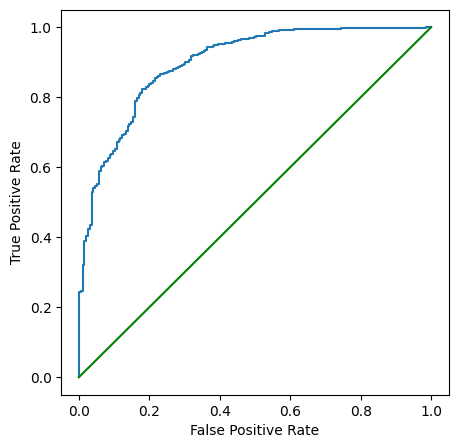

In [161]:
y_proba = modelo_combinado_3.predict_proba(X_val)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_val, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
#plot_sklearn_roc_curve(y_test, y_pred)

La forma de la curva AUC-ROC implica que el modelo es relativamente consistente en predecir las clases.

Cuando la curva azul está a la izquierda y arriba, quiere decir que el modelo puede predecir entre las clases. Cuando la curva azul sigue la línea verde de cerca, implica que el modelo no puede predecir entre las clases. Por último, cuando la curva azul se encuentra a la derecha y abajo, quiere decir que el modelo predice a la inversa, identifica a los positivos como negativos y viceversa.

Dada esta explicación, podemos concluir que el modelo tiene un desempeño positivo.

Es importante notar que de acuerdo a la curva, aún pudiera ser mejorable. Eso lo estaremos mejorando en una siguiente etapa del proyecto.

##### AUC-ROC

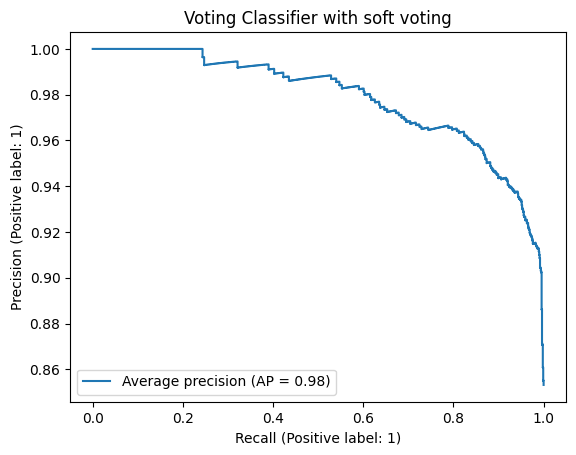

In [164]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    modelo_combinado_3, X_val, y_val, name="Average precision")
_ = display.ax_.set_title("Voting Classifier with soft voting")

Los valores de *recall* en el eje X, correspondientes a los valores de *precision* en el eje Y generan una curva que ilustra una función con pendiente negativa. Esta representa el compromiso entre precision (Reducir los Falsos Positivos) y Recall (Reducir los Falsos Negativos) para un modelo dado. Considerando la relación inversa entre precision y recall, la curva generalmente no es lineal, implicando que incrementar una de las métricas, necesariamente implica decrementar la otra. Pero el decremento pudiera no ser proporcional.

Como podemos ver en la curva Precission-Recall, el desempeño del modelo es adecuado, con un *Average precision* de **.98**.

Si bien el resultado es similar a la curva AUC-ROC, donde podemos concluir que el modelo va por buen camino, pero todavía pudiear mejorarse.

### Conclusiones

#### Modelos Utilizados

1.	Logistic Regression Hard voting (LRH)
2.	Logistic Regression Soft voting (LRH)
3.	Logistic Regression - Random Forest (LR-RS)

Se entrenaron tres modelos de ensamble diferentes utilizando los algoritmos mencionados anteriormente. Cada modelo fue evaluado utilizando la métrica de recall para los negativos como métrica principal, así como precisión y F1-score como métricas adicionales. También se registraron los tiempos de entrenamiento para cada modelo.

#### Comparación del Rendimiento de los Modelos

| Model | Recall(Neg) | Precision | F1-Score | Accuracy | Training Time(s) |
| --- | --- | --- | --- | --- | --- |
| Logisting Regression Hard | 0.83 | 0.961 | 0.88 | 0.81 | **0.45** |
| Logisting Regression Soft | 0.82 | 0.962 | 0.87 | 0.81 | 0.50 |
| Logistic Regresion - Random Forest | **0.84** | **0.964** | **0.88** | **0.82** | 5.56 |





#### Elegir el mejor modelo

A pesar de que el tiempo de entrenamiento es 10 veces superior, y que no hay mucha diferencia entre Recall y F1-Score con los otros modelos, podemos concluir que **Logistic Regression - Random Forest** es el mejor modelo.

Tal como se comentó durante el análisis de las gráficas, en las siguientes entregas se seguirá mejorando el desempeño del modelo y se buscará que lleguemos un mejor modelo para resolver el problema de abandono de tarjetas de crédito.

Durante este proceso hemos puesto especial atención a que los modelos no estén sobreentrenados o subentrenados, y es algo que seguiremos tomando en cuenta ahora que nso acercamos a las últimas etapas del proyecto.

### Referencias
1. Arize AI (2024, 8 abril) *Understanding and Applying F1 Score: AI Evaluation Essentials with Hands-On Coding Example.* Recuperado el 19 de Mayo de 2024 de https://arize.com/blog-course/f1-score/#:~:text=F1%20score%20is%20a%20useful,like%20fraud%20prevention%20and%20other
2. Brownlee, J. (2020, 17 agosto). *Ordinal and One-Hot Encodings for Categorical Data.* MachineLearningMastery.com. Recuperado el 4 de Mayo de 2024 https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
3. Crêteur, S. (2022, 16 diciembre). *Machine learning: one-hot encoding vs integer encoding*. Medium. Recuperado el 4 de Mayo de 2024 de https://medium.com/geekculture/
4. Galli, S. (2022). Python Feature Engineering Cookbook. Packt Publishing
5. Galarnyk, M. (2023, 26 julio). *Understanding boxplots.* Built In. Recuperado el 4 de Mayo de 2024 https://builtin.com/data-science/boxplot
6. GeeksforGeeks. (2023, 6 abril). *How to convert categorical string data into numeric in Python?* GeeksforGeeks. Recuperado el 4 de Mayo de 2024. https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/
7. GeeksforGeeks. (2024, 21 marzo). *How to create a seaborn correlation heatmap in Python?* GeeksforGeeks. Recuperado el 4 de Mayo de 2024. https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
8. GeeksforGeeks. (2024a, enero 9). *Plotting Histogram in Python using Matplotlib.* GeeksforGeeks. Recuperado el 5 de Mayo de 2024 https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
9. Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.). O´Reilly Media
10. Jacar (2023, 7 de marzo) *Ensamble de aprendizaje en ML*. Jacar. Recuperado el 2 de Junio de 2024 de https://jacar.es/ensamble-de-aprendizaje-en-ml/
11. Jafari, R. (2022). *Hands-On Data Preprocessing in Python: Learn How to Effectively Prepare Data for Successful Data Analytics.* Packt.
12. Kirasich, Kaitlin; Smith, Trace; and Sadler, Bivin (2018) *"Random Forest vs Logistic Regression: Binary Classification for Heterogeneous Datasets,"* SMU Data Science Review: Vol. 1: No. 3, Article 9. Recuperado el 26 de Mayo de 2024 de https://scholar.smu.edu/datasciencereview/vol1/iss3/9
13. Kumar Mukhiya, S., y Ahmed, U. (2020). *Hands-On Exploratory Data Analysis with Python*. Packt Publishing
machine-learning-one-hot-encoding-vs-integer-encoding-f180eb831cf1
14. Koehrsen, W. (2023, 8 marzo). *Precision and Recall: How to Evaluate Your Classification Model.* Built In. Recuperado el 26 de Mayo de https://builtin.com/data-science/precision-and-recall
15. Marcinrutecki. (2023, 7 febrero). *Voting Classifier for Better Results.* Kaggle. Recuperado el 2 de Junio de 2024 de https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results
Narkhede, S. (2022, 5 marzo). *Understanding AUC - ROC Curve - towards data science.* Medium. Recuperado el 6 de Junio de https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
16. Pulagam, S. (2021, 14 diciembre). *All you need to know about PCA technique in Machine Learning*. Medium. Recuperado el 3 de Mayo de 2024 de https://towardsdatascience.com/all-you-need-to-know-about-pca-technique-in-machine-learning-443b0c2be9a1
17. Saturn Cloud Blog. (2024, 5 enero). *How to Convert Categorical Data to Numerical Data with Pandas* Recuperado el 4 de Mayo de 2024 https://saturncloud.io/blog/how-to-convert-categorical-data-to-numerical-data-with-pandas/
18. Scikit-learn (s. f.) *sklearn.linear_model.LogisticRegression.* Recuperado el 19 de Mayo de 2024 de https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
19. Scikit-learn (s. f.) *Statistical comparison of models using grid search.* recuperado el 26 de Mayo de 2026 https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html
20. Singh, A. (2023, julio 14). *Comprehensive Guide to Ensemble Learning (with Python codes)*. Analytics Vidhya. Recuperado el 6 de Junio de 2024 de https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/#4
21. VanderPlas, J. (2022). *Python Data Science Handbook (2nd ed.)*. O'Reilly Media.
22. Visengeriyeva, L., Kammer, A., Bär, I., Kniesz, A., y Plöd, M. (2023). CRISP-ML(Q). *The ML Lifecycle Process*. MLOps. INNOQ